# Clustering Universities: Private vs. Public Using KMeans

For this project  i will attempt to use KMeans Clustering to cluster Universities into two groups, Private and Public.

__
When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case we will use the labels to try to get an idea of ​​how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!
___

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('College_Data',index_col=0)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

# EDA

** Creating a scatterplot of Grad.Rate vs. Room.Board where the points will be colored by the Private column. **


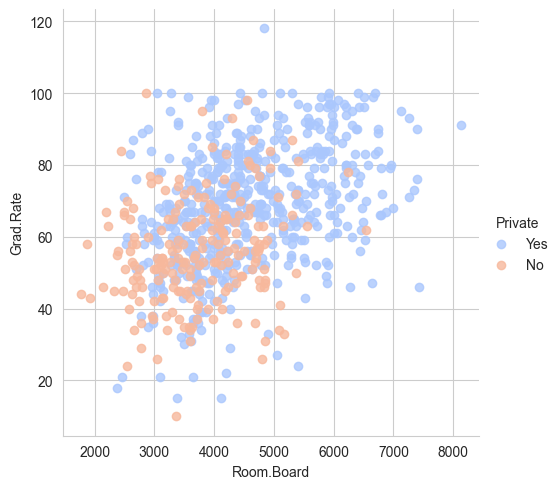

In [4]:
sns.set_style('whitegrid')
sns.lmplot(data=df,x='Room.Board',y='Grad.Rate',hue='Private',fit_reg=False,
          palette='coolwarm',aspect=1)

Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.

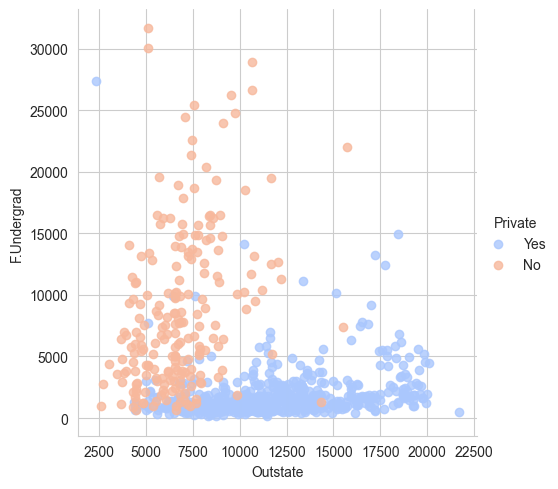

In [5]:
sns.lmplot(df,x='Outstate',y='F.Undergrad',hue='Private',fit_reg=False,
          palette= 'coolwarm')

**Create a stacked histogram based on a private column showing tuition outside of the state. Using sns.FacetGrid . If this is too complicated, try using the two examples of pandas.plot(kind='hist') . **

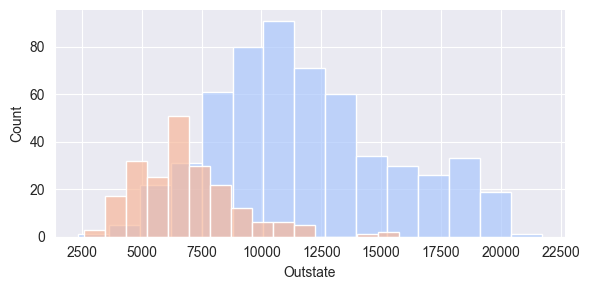

In [6]:
sns.set_style('darkgrid')
g= sns.FacetGrid(df,hue='Private',palette='coolwarm',aspect=2)
g.map(sns.histplot,'Outstate',bins=15,alpha=.7)

In [ ]:
g = sns.FacetGrid(df,hue='Private',palette='coolwarm',aspect=2,height=4)
g.map(sns.histplot,'Grad.Rate',bins=15,alpha=.7)

**Notice how there seems to be a private school with a graduation rate of higher than 100% ,Name of that school?**

In [8]:
df[df['Grad.Rate']> 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


**When performing this operation, the school graduation rate is set to 100 so that it makes sense. So use the DataFrame operation or rerun the histogram visualization to make sure it actually works.**

In [12]:
df.loc['Cazenovia College', 'Grad.Rate'] = 100

In [10]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


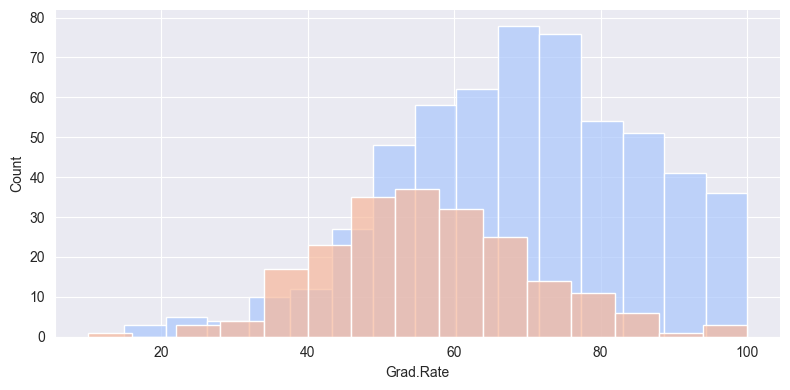

In [11]:
g = sns.FacetGrid(df,hue='Private',palette='coolwarm',aspect=2,height=4)
g.map(sns.histplot,'Grad.Rate',bins=15,alpha=.7)

## K Means Cluster Creation

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [15]:
kmeans.fit(df.drop('Private',axis=1))

KMeans(n_clusters=2)

In [16]:
kmeans.cluster_centers_

array([[1.95066765e+03, 1.32671029e+03, 4.94677941e+02, 2.65794118e+01,
        5.45044118e+01, 2.16543088e+03, 5.50792647e+02, 1.06661515e+04,
        4.36827794e+03, 5.43804412e+02, 1.26665147e+03, 7.09970588e+01,
        7.82573529e+01, 1.38476471e+01, 2.35823529e+01, 9.55680000e+03,
        6.58308824e+01],
       [1.03692680e+04, 6.87059794e+03, 2.77997938e+03, 3.44226804e+01,
        6.48556701e+01, 1.44570619e+04, 2.98997938e+03, 8.85996907e+03,
        4.28215464e+03, 5.88474227e+02, 1.85934021e+03, 8.43195876e+01,
        8.98350515e+01, 1.57865979e+01, 1.68659794e+01, 1.03848351e+04,
        6.27010309e+01]])

## Evaluation

In [17]:
df['Cluster'] = df['Private'].apply(lambda x :1 if x=='Yes' else 0)

In [18]:
df.head(2)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1


In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print('\n')
print(classification_report(df['Cluster'],kmeans.labels_))

[[129  83]
 [551  14]]


              precision    recall  f1-score   support

           0       0.19      0.61      0.29       212
           1       0.14      0.02      0.04       565

    accuracy                           0.18       777
   macro avg       0.17      0.32      0.17       777
weighted avg       0.16      0.18      0.11       777



## More Prepare the Data

In [22]:
X = df.drop(columns=["Cluster", 'Private'], axis=1)

In [24]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.17992933e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51804628e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.68710475e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.60975094e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.96167109e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.96167109e+00]])

## Determine the Optimal Number of Clusters

In [27]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

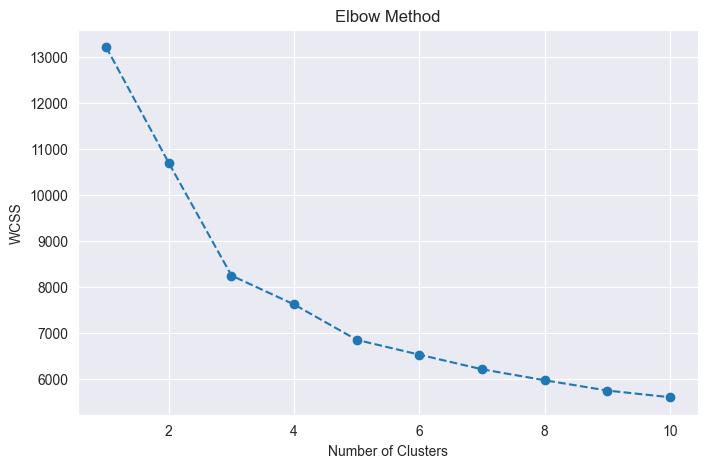

In [28]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
from kneed import KneeLocator
kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

# Print the optimal number of clusters
print("Optimal number of clusters:", kn.knee)

## Build the KMeans Model

In [30]:
optimal_clusters = 3  # Replace with your chosen value
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [31]:
print(kmeans.cluster_centers_)

[[-0.37121158 -0.36101357 -0.33696673 -0.5295144  -0.55519495 -0.31185023
  -0.12785759 -0.47491443 -0.3670614  -0.10248925  0.03788793 -0.56081008
  -0.55751843  0.23271392 -0.33255606 -0.44007987 -0.35629428]
 [-0.03491912 -0.11663877 -0.23321938  0.85584974  0.83757607 -0.30207524
  -0.36957759  1.04868266  0.71768809  0.05906132 -0.37449144  0.73753847
   0.73607726 -0.6354434   0.8170256   0.80568529  0.77194024]
 [ 1.8406535   2.0087858   2.20390747  0.22998143  0.39926533  2.26775172
   1.57976036 -0.53724098 -0.16966     0.3264646   0.81215031  0.69032634
   0.67868889  0.5848428  -0.59493273 -0.05853333 -0.36387534]]


In [32]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print('\n')
print(classification_report(df['Cluster'],kmeans.labels_))

[[438   0   0]
 [  0 246   0]
 [  0   0  93]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       1.00      1.00      1.00       246
           2       1.00      1.00      1.00        93

    accuracy                           1.00       777
   macro avg       1.00      1.00      1.00       777
weighted avg       1.00      1.00      1.00       777



## thank You